### STEP1: Importing Libraries


In [2695]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

### STEP:2 Reading and Understanding Data

In [2696]:
HD=pd.read_csv('train.csv')
HD.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2697]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2698]:
HD.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2699]:
HD.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

### STEP:3 DATA CHECKING AND CLEANING

####  A.CHECKING FOR NULL VALUES

In [2700]:
print(dict(round((HD.isnull().sum()/HD.shape[0])*100,2)))

{'Id': 0.0, 'MSSubClass': 0.0, 'MSZoning': 0.0, 'LotFrontage': 17.74, 'LotArea': 0.0, 'Street': 0.0, 'Alley': 93.77, 'LotShape': 0.0, 'LandContour': 0.0, 'Utilities': 0.0, 'LotConfig': 0.0, 'LandSlope': 0.0, 'Neighborhood': 0.0, 'Condition1': 0.0, 'Condition2': 0.0, 'BldgType': 0.0, 'HouseStyle': 0.0, 'OverallQual': 0.0, 'OverallCond': 0.0, 'YearBuilt': 0.0, 'YearRemodAdd': 0.0, 'RoofStyle': 0.0, 'RoofMatl': 0.0, 'Exterior1st': 0.0, 'Exterior2nd': 0.0, 'MasVnrType': 0.55, 'MasVnrArea': 0.55, 'ExterQual': 0.0, 'ExterCond': 0.0, 'Foundation': 0.0, 'BsmtQual': 2.53, 'BsmtCond': 2.53, 'BsmtExposure': 2.6, 'BsmtFinType1': 2.53, 'BsmtFinSF1': 0.0, 'BsmtFinType2': 2.6, 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 0.0, 'TotalBsmtSF': 0.0, 'Heating': 0.0, 'HeatingQC': 0.0, 'CentralAir': 0.0, 'Electrical': 0.07, '1stFlrSF': 0.0, '2ndFlrSF': 0.0, 'LowQualFinSF': 0.0, 'GrLivArea': 0.0, 'BsmtFullBath': 0.0, 'BsmtHalfBath': 0.0, 'FullBath': 0.0, 'HalfBath': 0.0, 'BedroomAbvGr': 0.0, 'KitchenAbvGr': 0.0, 'Kitchen

In [2701]:
## NULL VALUES WITH PERCENTAGE
A=round((HD.isnull().sum()/HD.shape[0])*100,2)
A.sort_values(ascending=False).head(25)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
dtype: float64

#### B. DROPPING  COLUMNS AND ROWS

__PoolQC','MiscFeature','Alley','Fence' variables contain unique feature more than 80%__<br>
__Removing these variables will not influence the analysis__

In [2702]:
HD.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [2703]:
HD.shape

(1460, 77)

_MasVnrType','Electrical'don't have data, the missing percentage is less than 1 percent
<br>
_Insignificant missing data percentage, so we removed the rows which contain missing data_

In [2704]:
HD.dropna(subset=['MasVnrType','Electrical'], inplace=True)

In [2705]:
HD.shape

(1451, 77)

#### C. IMPUTING THE MISSING DATA

__LotFrontage,GarageYrBlt missing data is less than 20 percent. The variable seems important for determining sale price, so the 
data is imputed with median__

In [2706]:
HD['LotFrontage']=HD['LotFrontage'].fillna(HD['LotFrontage'].median())

In [2707]:
HD['GarageYrBlt']=HD['GarageYrBlt'].fillna(HD['GarageYrBlt'].median())

In [2708]:
HD.FireplaceQu.value_counts()

Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### D.CORRECTING THE NAN SEGMENTS OF CATEGORICAL VARIABLES

__GARAGE, BASEMENT, FIREPLACEQU ARE NOT THERE FOR SOME HOUSES. THESE ARE DESCRIBED AS NA IN COLUMNS, THIS LED TO MISINTERPRETATION OF
THOSE VALUES AS NAN.__
<br>
__THE DATA OF THOSE WITH NA IS CORRECTED TO NO GARAGE, NO BASEMENT, NO FIREPLACE__

In [2709]:
Garage =['GarageCond','GarageType','GarageFinish','GarageQual']
Basement=['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1']
columns=Garage+Basement+['FireplaceQu']
for i in columns:
    if i in Garage:
        HD[i]=HD[i].fillna('No Garage')
    elif i in Basement:
        HD[i]=HD[i].fillna('No Basement')
    else:
         HD[i]=HD[i].fillna('No Fireplace')
        
      
    
   
         
         
    

In [2710]:
## Again checking for missing percentage values in each column
round((HD.isnull().sum()/HD.shape[0])*100,2).sort_values(ascending=False).head(35)

Id               0.0
HalfBath         0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
FullBath         0.0
HeatingQC        0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
dtype: float64

In [2711]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

_THE MISSING VALUES PROBLEM IS ADRESSED AND BROUGHT MISSING PERCENTAGE TO 0_

#### E. CHANGING DATA TYPE

_changing MSSubClass to category from int. the data is un ordered category type but assigned numbers to represent those segments in category._

In [2712]:
HD['MSSubClass']=HD['MSSubClass'].astype('object')

In [2713]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

__AGE FORMAT__
_Years are  mentioned as difference of max year and given year. this will represent data in no. of years format_

In [2714]:
YEARS=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in YEARS:
    HD[i]=HD[i].max()-HD[i]
    
HD[YEARS].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


__IDENTIFYING COLUMNS WHICH CONTAIN ONE UNIQUE VALUE DOMINATED__<br>
_it is just for our understanding, these dont impact our analysis. now, we will keep the variables without dropping_

In [2715]:
## Create empty dataframe
uniq=pd.DataFrame()
# creating rows for
#max percentage of unique value in a column, max frequency in a column,name of that segment or value in that column
for i in HD.columns:
    uniq[i]=[max(HD[i].value_counts())/HD.shape[0],max(HD[i].value_counts()),HD[i].value_counts().index.tolist()[0]]
    
# Accesing first row value (i.e percentage of missing values)
pv=uniq.iloc[0]
j=uniq.columns
k=0
# filtering columns that contain a unique value more than 95 percent 
for i in pv:
    if i>0.95:
    
        print(i,j[k])
    k=k+1
print(k)

0.9958649207443143 Street
0.9993108201240524 Utilities
0.9896623018607856 Condition2
0.9820813232253618 RoofMatl
0.9779462439696761 Heating
0.9820813232253618 LowQualFinSF
0.9538249483115093 KitchenAbvGr
0.983459682977257 3SsnPorch
0.9951757408683667 PoolArea
0.9641626464507237 MiscVal
77


_LowQualFinSF,KitchenAbvGr,3SsnPorch,PoolArea,MiscVal contain 98 percent of unique data_
<br>_this doesn't help for our data analysis, we may ignore if required._

In [2716]:
# These are not required for our analysis
HD=HD.drop(['Id','MoSold'],axis=1)

### Checking Target Variable

<function matplotlib.pyplot.show(close=None, block=None)>

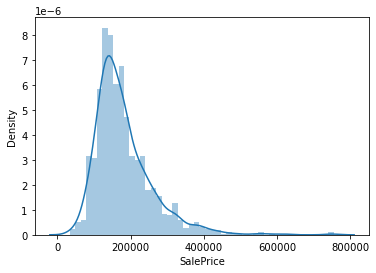

In [2717]:
sns.distplot(HD['SalePrice'])
plt.show

_The graph is positively skewed.Applying logarithmic Transforamtion for acheiving normal distribution_

<function matplotlib.pyplot.show(close=None, block=None)>

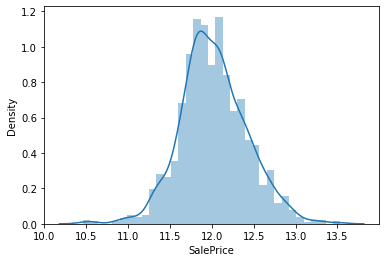

In [2718]:
HD['SalePrice'] = np.log(HD['SalePrice'])
sns.distplot(HD['SalePrice'])
plt.show

_Graph seems to have a fair normal distribution_

### STEP:4  NUMERICAL ANALYSIS

In [2719]:
## # SELECTING NUMERICAL VARIABLES FROM HOUSING DATA HD
HD_NUM=HD.select_dtypes(include=np.number).columns.tolist()
print('numerical variables are',len(HD_NUM))

numerical variables are 35


#### UNIVARIATE ANALYSIS (DISTRIBUTION PLOTS)

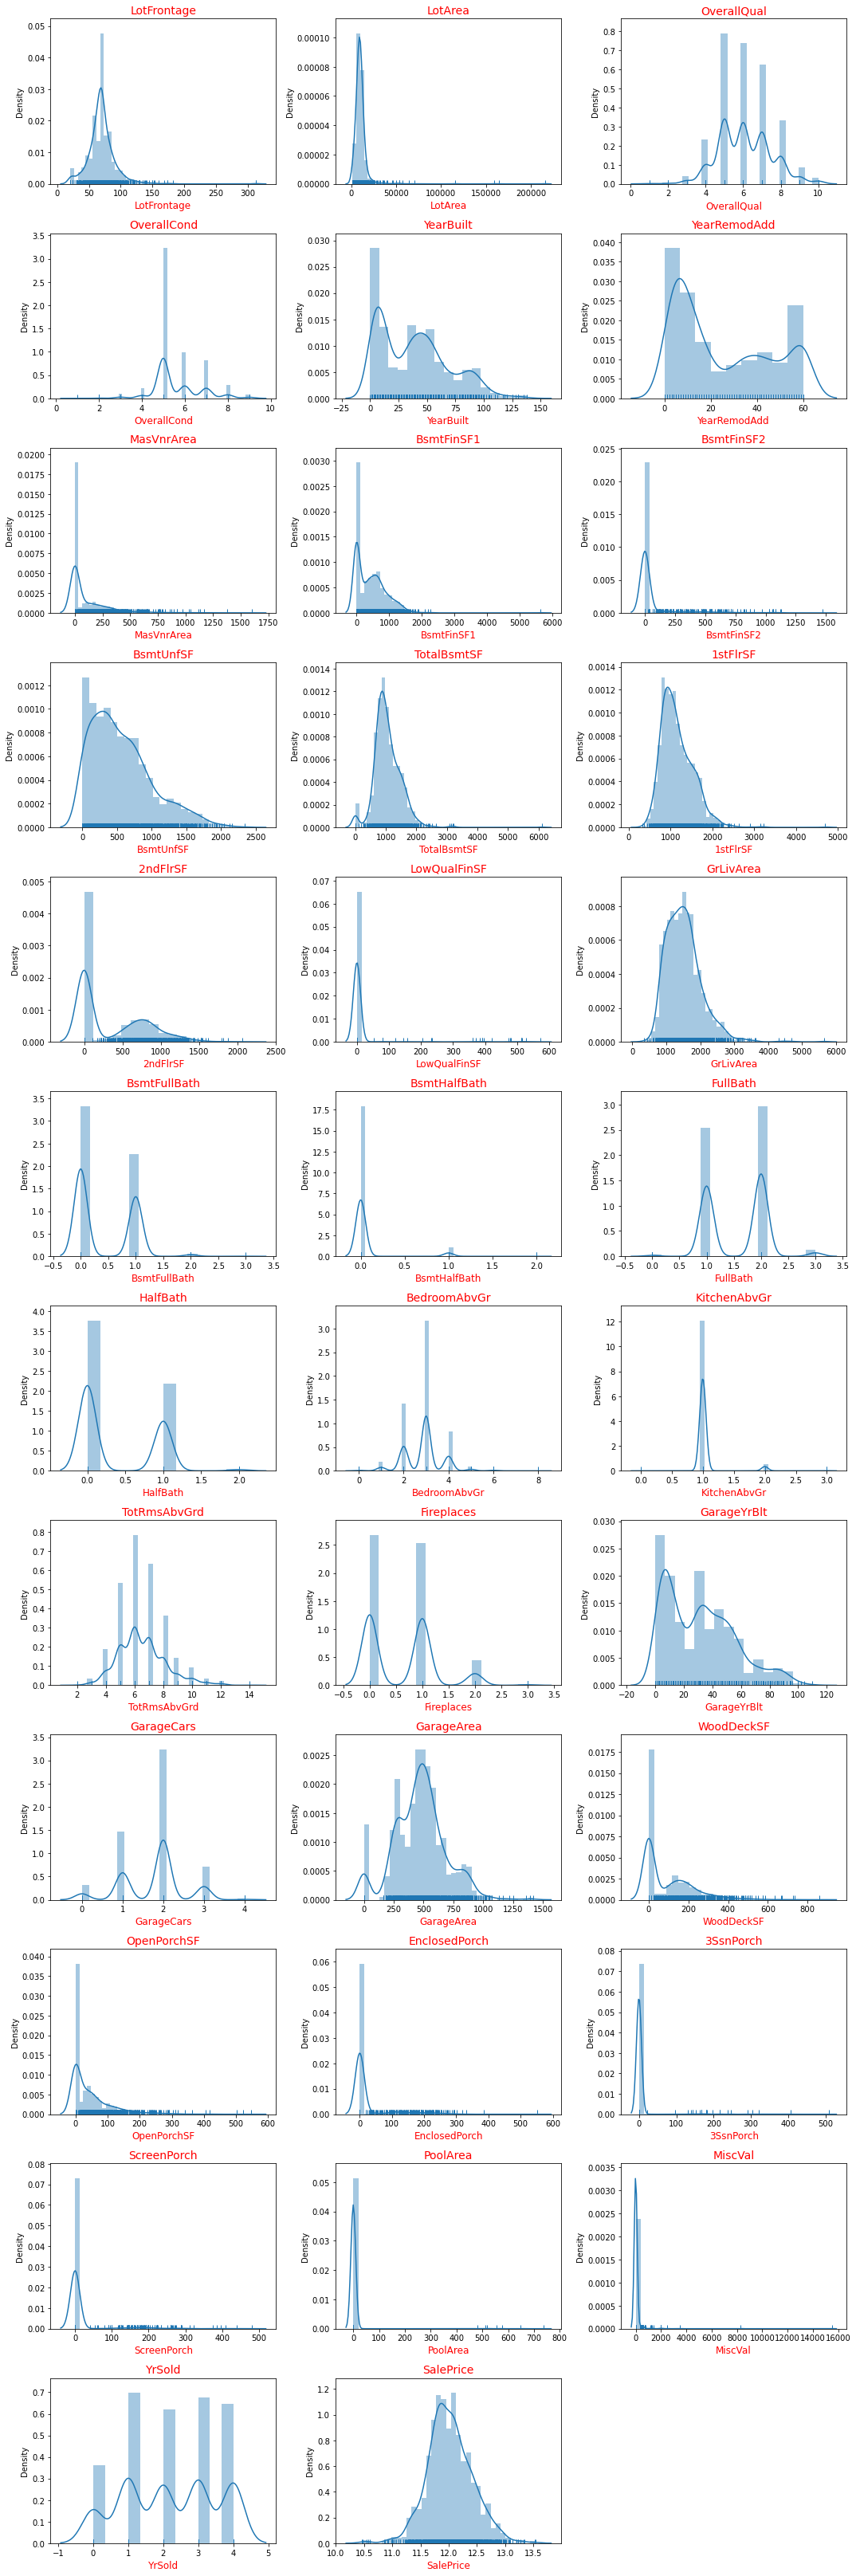

In [2720]:
plt.figure(figsize=(50,50)).set_size_inches(15, 45)
j=1

for i in HD_NUM:
    plt.subplot(12,3,j)
    sns.distplot(HD[i],kde=True,rug=True)
    plt.title(i,fontsize=14,color='r')
    plt.xlabel(i,fontsize=12,color='r')
    j=j+1
plt.tight_layout()
plt.show();

__SKEWNESS MEASUREMENT__

In [2721]:
from scipy.stats import skew 
skew_data = HD[HD_NUM].iloc[:,:].apply(lambda x: skew(x))
skew_data.sort_values(ascending=False)

MiscVal          24.376280
PoolArea         14.766783
LotArea          12.223089
3SsnPorch        10.261120
LowQualFinSF      8.973279
KitchenAbvGr      4.508151
BsmtFinSF2        4.235845
ScreenPorch       4.103163
BsmtHalfBath      4.084356
EnclosedPorch     3.090802
MasVnrArea        2.665258
LotFrontage       2.416964
OpenPorchSF       2.382442
BsmtFinSF1        1.700822
WoodDeckSF        1.540277
TotalBsmtSF       1.533978
GrLivArea         1.372092
1stFlrSF          1.371722
BsmtUnfSF         0.919025
2ndFlrSF          0.814923
OverallCond       0.693187
HalfBath          0.684419
TotRmsAbvGrd      0.680159
GarageYrBlt       0.668770
Fireplaces        0.647074
YearBuilt         0.607592
BsmtFullBath      0.603565
YearRemodAdd      0.495826
BedroomAbvGr      0.217622
OverallQual       0.213184
GarageArea        0.182396
SalePrice         0.121812
FullBath          0.037717
YrSold           -0.096033
GarageCars       -0.337070
dtype: float64

In [2722]:
## FILTERING COLUMNS WITH SKEWNESS MORE THAN 0.5
high_skewness = skew_data[skew_data > 0.5]
print(high_skewness.index)
len(high_skewness)

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


27

In [2723]:
## NOT REQUIRED
#for i in high_skewness.index:
    #HD[i] = np.log1p(HD[i])
#skew_data1=HD[HD_NUM].iloc[:,:].apply(lambda x: skew(x))
#skew_data1.sort_values(ascending=False)

#### REMOVING OUTLIERS

In [2724]:

def drop_outliers(x):
    list = []
    for i in high_skewness.index:
        Q1 = x[i].quantile(.05)
        Q3 = x[i].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[i] >= (Q1-(1.5*IQR))) & (x[i] <= (Q3+(1.5*IQR)))] 
    return x   

HD= drop_outliers(HD)
print(HD.shape)
skew_data2=HD[HD_NUM].iloc[:,:].apply(lambda x: skew(x))
skew_data2.sort_values(ascending=False)

(1257, 75)


BsmtHalfBath     4.137966
BsmtFinSF2       3.838364
ScreenPorch      3.790688
EnclosedPorch    2.928945
MasVnrArea       2.218614
OpenPorchSF      1.793242
LotArea          1.426682
WoodDeckSF       1.379401
1stFlrSF         0.954408
BsmtUnfSF        0.941487
2ndFlrSF         0.784843
GrLivArea        0.770487
OverallCond      0.769630
TotalBsmtSF      0.737132
BsmtFinSF1       0.722188
GarageYrBlt      0.659613
LotFrontage      0.645936
YearBuilt        0.621207
Fireplaces       0.593479
YearRemodAdd     0.564989
HalfBath         0.546044
TotRmsAbvGrd     0.484052
BsmtFullBath     0.403651
GarageArea       0.231107
OverallQual      0.128487
FullBath         0.091115
SalePrice        0.035202
KitchenAbvGr     0.000000
3SsnPorch        0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MiscVal          0.000000
YrSold          -0.102256
BedroomAbvGr    -0.195396
GarageCars      -0.268634
dtype: float64

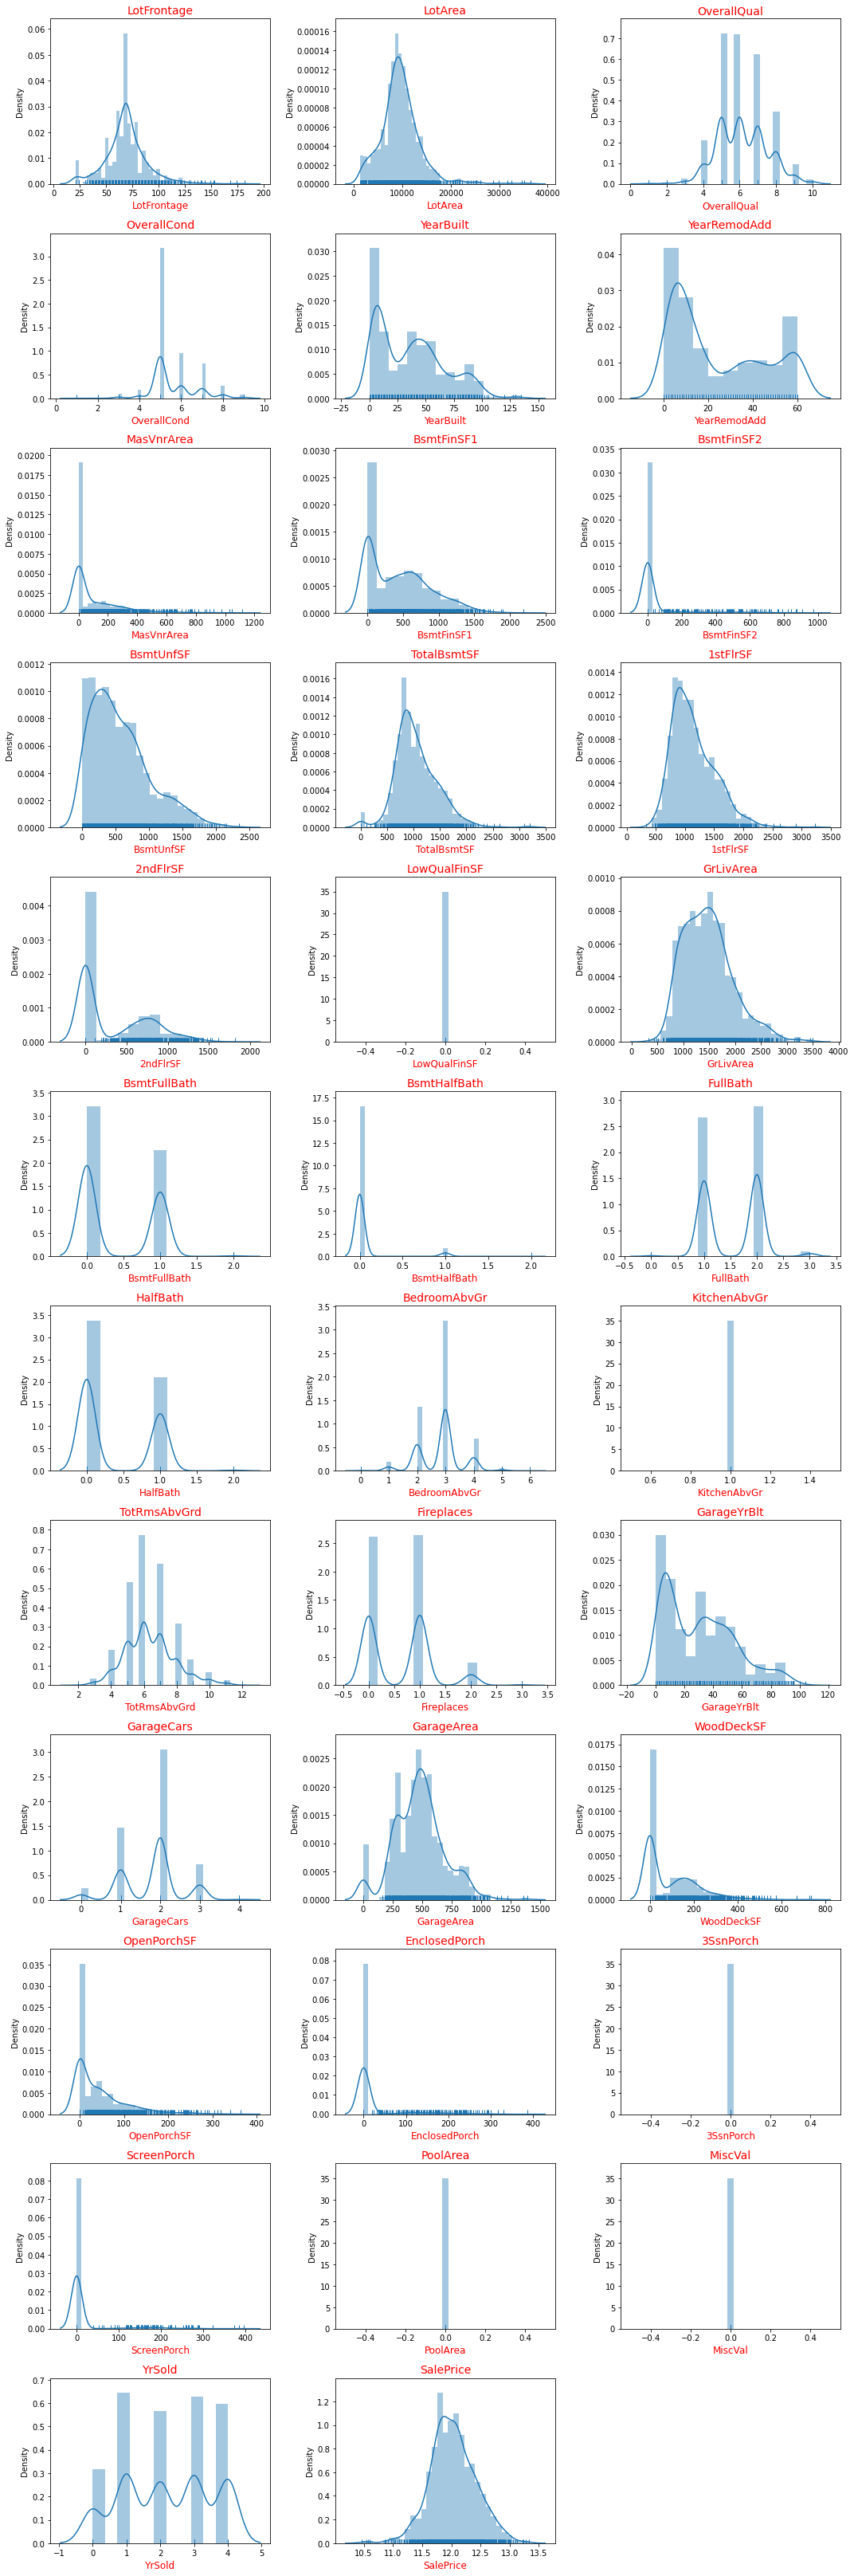

In [2725]:
plt.figure(figsize=(50,50)).set_size_inches(15, 45)
j=1

for i in HD_NUM:
    plt.subplot(12,3,j)
    sns.distplot(HD[i],kde=True,rug=True)
    plt.title(i,fontsize=14,color='r')
    plt.xlabel(i,fontsize=12,color='r')
    j=j+1
plt.tight_layout()
plt.show();

__After removing outliers in the data. skewness got reduced and distribution looks better than earlier__

#### BIVARIATE ANALYSIS( CORRELATION USING HEAT MAP)

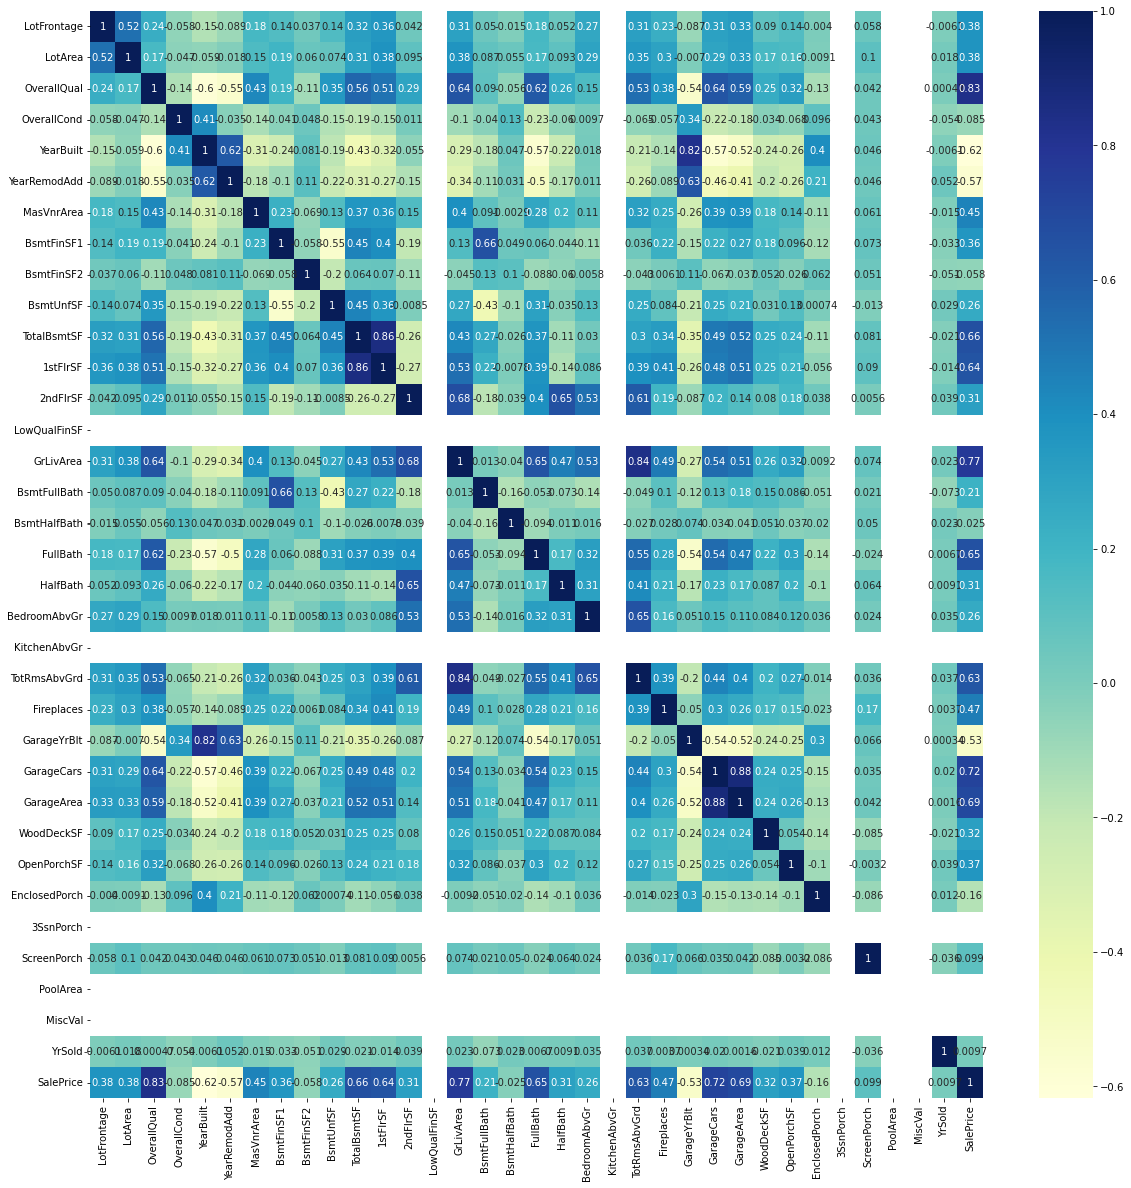

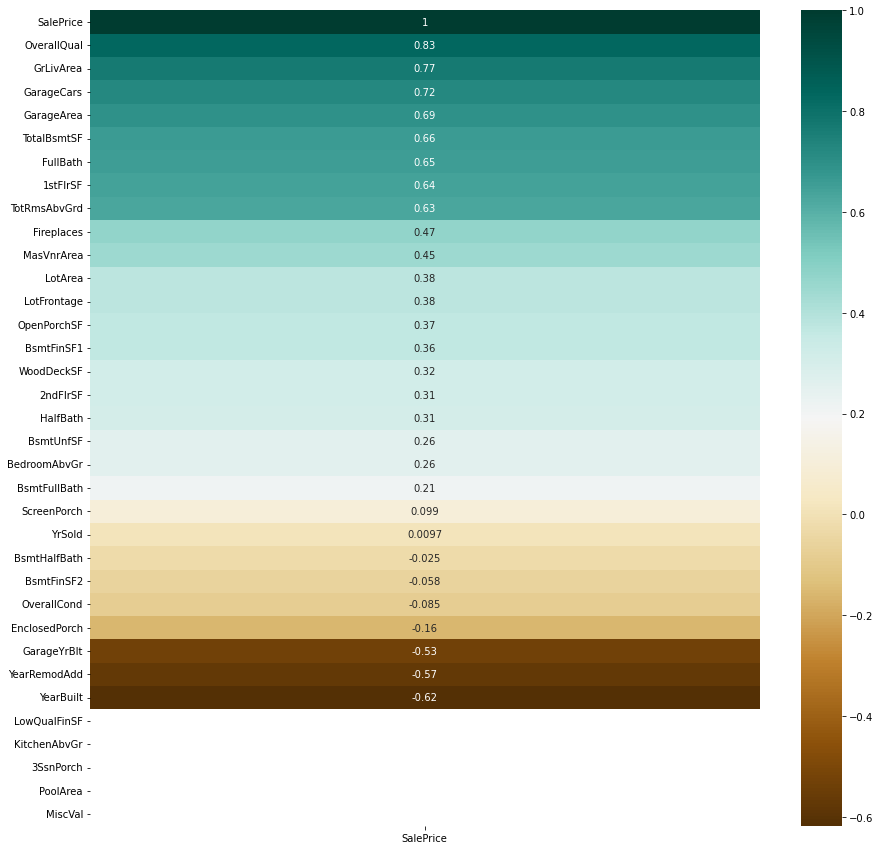

In [2726]:
plt.figure(figsize = (20, 20))
sns.heatmap(HD[HD_NUM].corr(), annot = True, cmap="YlGnBu")
plt.show()
plt.figure(figsize = (15, 15))
sns.heatmap(HD[HD_NUM].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),annot=True, cmap='BrBG')
plt.show()

The top variables that influences sales price are,<br>
1. OverallQual,
2. GrLivArea
3. GarageCars
4. GarageArea
5. TotalBsmtSF
6. FullBath
7. 1stFlrSF
8. TotRmsAbvGrd__

###  STEP:5 CATEGORICAL ANALYSIS

In [2727]:
# SELECTING CATEGORICAL VARIABLES FROM HOUSING DATA HD
HD_CAT = HD.select_dtypes(include= object).columns.tolist()
HD_CAT

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [2728]:
## CREATED NEW DATA THAT CONTAINS ONLY CATEGORICAL COLUMNS
HD_CAT_D = HD[HD_CAT]
HD_CAT_D.shape

(1257, 40)

__BOX PLOTS BETWEEN CATEGORICAL VARIABLES AND RESPONSE VARIABLE SALES PRICE__

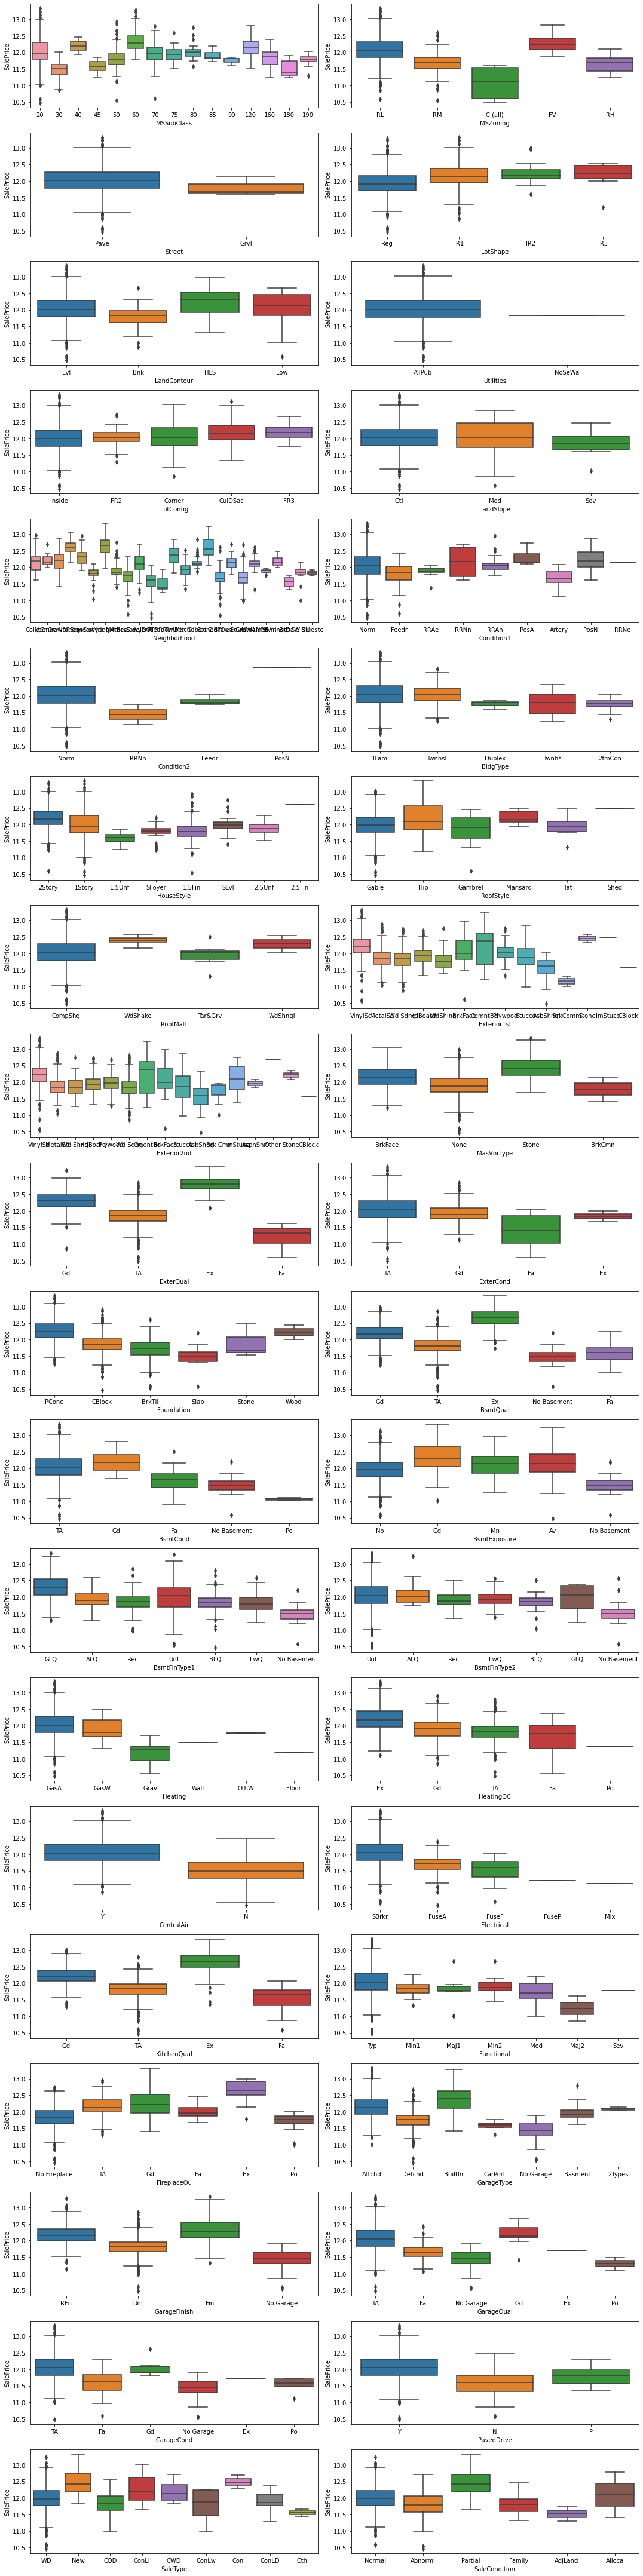

In [2729]:
plt.figure(figsize=(50,50)).set_size_inches(15, 60)
j=1

for i in HD_CAT_D:
    plt.subplot(20,2,j)
    sns.boxplot(x=HD_CAT_D[i],y=HD['SalePrice'])
    j=j+1
plt.tight_layout()
plt.show();

_Most of the variables have fair median values and distributions_<br>


#### CREATING  DUMMY VARIABLES FOR CATEGORICAL COLUMNS

In [2730]:
HD_CAT_D = pd.get_dummies(HD_CAT_D,drop_first=True)

In [2731]:
HD_CAT_D.shape

(1257, 214)

In [2732]:
HD_CAT_D.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [2733]:
## DROPPING THE ORIGINAL CATEGORICAL COLUMNS IN HD
HD = HD.drop(HD_CAT, axis=1)

In [2734]:
## CONCATENATION OF DUMMY VARIABLEES TO HOUSING DATA HD
HD = pd.concat([HD,HD_CAT_D], axis=1)

In [2735]:
HD.shape

(1257, 249)

In [2736]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1459
Columns: 249 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(31), uint8(214)
memory usage: 648.5 KB


###  STEP:6 SPLIT DATA FOR TRAIN-TEST

In [2737]:
## SELECTING INDEPENDENT AND RESPONSE VARIABLES
X=HD.drop('SalePrice',axis=1)
Y=HD.pop('SalePrice')


In [2738]:
from sklearn.model_selection import train_test_split

In [2739]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2740]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(879, 248)
(378, 248)
(879,)
(378,)


### STEP:7  RESCALING AND BUILDING MODELS

In [2741]:
# SCALING
scaler = MinMaxScaler()
NUM_COLS=X_train.select_dtypes(exclude ='uint8').columns.tolist()
# Scaling X train and test data for NUM_COLS
X_train[NUM_COLS]= scaler.fit_transform(X_train[NUM_COLS])
X_test[NUM_COLS]= scaler.transform(X_test[NUM_COLS])
# Scaling Y train and test data  for sales price
Y_train =Y_train.values.reshape(-1,1)
Y_train1=scaler.fit_transform(Y_train)

Y_test=Y_test.values.reshape(-1,1)
Y_test1=scaler.transform(Y_test)

print(X_train.describe())
print(Y_train1.shape)


       LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  \
count   879.000000  879.000000   879.000000   879.000000  879.000000   
mean      0.296999    0.238820     0.571483     0.432689    0.271764   
std       0.125229    0.121376     0.151575     0.179958    0.222342   
min       0.000000    0.000000     0.000000     0.000000    0.000000   
25%       0.242236    0.173793     0.444444     0.333333    0.052239   
50%       0.298137    0.224432     0.555556     0.333333    0.246269   
75%       0.354037    0.288608     0.666667     0.500000    0.410448   
max       1.000000    1.000000     1.000000     1.000000    1.000000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    879.000000  879.000000  879.000000  879.000000  879.000000  ...   
mean       0.408191    0.091516    0.201122    0.043712    0.245504  ...   
std        0.345898    0.151637    0.192953    0.148938    0.188868  ...   
min        0.000000    0.000000    0.000000    

### LINEAR REGRESSION

In [2742]:
## Initialize linear regression
lm=LinearRegression()
##2.fit model
lm.fit(X_train,Y_train1)

LinearRegression()

In [2743]:
## Parameters
print(lm.coef_)
print(lm.intercept_)

[[ 3.04573465e-02  7.79754021e-02  1.19923584e-01  9.26806909e-02
  -1.08459286e-01 -8.59669843e-03  7.84616827e-03 -1.11303782e+11
  -4.94457388e+10 -1.18832558e+11  1.63089546e+11  1.43446670e+11
   1.01710626e+11 -3.90959456e+10 -1.76734801e+11  1.18932724e-02
   9.64403152e-03  2.44188309e-02  1.60293579e-02  1.00994110e-03
  -3.14297003e+10  2.03781128e-02  9.34267044e-03  1.13973618e-02
   4.46944237e-02  3.75146866e-02  2.13983059e-02  2.82979012e-02
   1.01535320e-02  3.70639719e+10  4.29247618e-02  2.46697139e+10
   1.92143970e+10  2.60257721e-03 -1.22966766e-02  3.01890373e-02
  -6.89718723e-02 -3.62691879e-02 -7.30438232e-02 -4.85477448e-02
   9.54334789e+08 -1.74269676e-02 -1.14164352e-02  2.72273313e+10
   9.89985466e-03 -8.76083374e-02 -2.16467381e-02 -6.68254867e-02
   1.84619784e-01  1.43459320e-01  1.61239624e-01  1.54464722e-01
  -2.01635361e-02  4.54163551e-03 -1.07288361e-03  3.55148315e-03
   1.95415020e-02 -5.05745411e-03  2.57778168e-03 -9.30575430e-02
   8.74292

In [2744]:
# predictions on test set
y_train_pred=lm.predict(X_train)
y_test_pred=lm.predict(X_test)


In [2745]:
# EValuation metric
LinearMetrics=[]
R2_train_lin=r2_score(Y_train1,y_train_pred)
R2_test_lin=r2_score(Y_test1,y_test_pred)

Rss_train_lin=np.sum(np.square(Y_train1-y_train_pred))
Rss_test_lin=np.sum(np.square(Y_test1-y_test_pred))

RMSE_train_lin=np.sqrt(mean_squared_error(Y_train1,y_train_pred))
RMSE_test_lin=np.sqrt(mean_squared_error(Y_test1,y_test_pred))

LinearMetrics.extend([R2_train_lin,R2_test_lin,Rss_train_lin,Rss_test_lin,RMSE_train_lin,RMSE_test_lin])
print(LinearMetrics)

[0.9546068760873608, -707301318.7514871, 0.7488733528770188, 5156400753.06739, 0.02918836383694429, 3693.4092426255197]


_The R2_score on test is negative, it is overfitting so let's try using RFE_

###  Linear Regression Using RFE

In [2746]:
from sklearn.feature_selection import RFE

In [2747]:
lm1=LinearRegression()
lm1.fit(X_train,Y_train1)
## we gave 30 as a parameter for rfe for shortlisting variables
rfe=RFE(lm1,30)
rfe=rfe.fit(X_train,Y_train1)

In [2748]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 35),
 ('LotArea', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', False, 6),
 ('YearBuilt', False, 5),
 ('YearRemodAdd', False, 137),
 ('MasVnrArea', False, 163),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 103),
 ('BsmtHalfBath', False, 134),
 ('FullBath', False, 116),
 ('HalfBath', False, 119),
 ('BedroomAbvGr', False, 212),
 ('KitchenAbvGr', False, 8),
 ('TotRmsAbvGrd', False, 61),
 ('Fireplaces', False, 126),
 ('GarageYrBlt', False, 152),
 ('GarageCars', False, 54),
 ('GarageArea', False, 12),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 69),
 ('EnclosedPorch', False, 121),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 59),
 ('PoolArea', False, 19),
 ('MiscVal', False, 37),
 ('YrSold', False, 197),
 ('MSSubClass_30', False, 139),
 ('MSSubClass_40', False, 6

In [2749]:
## columns shortlisted by rfe
rf_1=X_train.columns[rfe.support_]
rf_1

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSSubClass_75', 'MSSubClass_90',
       'BldgType_Duplex', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_No Basement',
       'BsmtCond_No Basement', 'BsmtFinType1_No Basement',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_No Garage', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_No Garage', 'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [2750]:
## columns dropped from analysis by rfe
rf_2=X_train.columns[~rfe.support_]
rf_2

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=218)

In [2751]:
X_train_rfe = X_train[rf_1]

In [2752]:
## BUILDING A LINEAR MODEL
lr=LinearRegression()
lr.fit(X_train_rfe,Y_train1)
#lr = sm.OLS(Y_train1, X_train_lmrfe).fit()

#lr.params
print(lr.coef_)
print(lr.intercept_)

[[ 0.39404731  0.1617514   0.02879792  0.07320857  0.17246377  0.09153754
   0.11535075  0.14068057 -0.03140642 -0.00212884 -0.00212884 -0.03001424
  -0.00139217 -0.02311886 -0.02311886  0.01798697  0.01798697  0.01798697
  -0.01970707 -0.01970707 -0.0395518  -0.01279844 -0.01970707 -0.04573804
  -0.00428805 -0.04699174 -0.01552    -0.01970707 -0.01845772 -0.02140685]]
[0.1396839]


In [2753]:
# predictions on train set
y_train_rfpred=lr.predict(X_train_rfe)

# preparing test data by including rfe supported columns
X_test_rfe = X_test[rf_1]
#X_test_lmrfe = sm.add_constant(X_test_rfe)

# predictions on train set
y_test_rfpred=lr.predict(X_test_rfe)


In [2754]:
# Evaluation Metrics
RFEMetrics=[]
R2_train_rfe=r2_score(Y_train1,y_train_pred_rfe)
R2_test_rfe=r2_score(Y_test1,y_test_pred_rfe)

Rss_train_rfe=np.sum(np.square(Y_train1-y_train_rfpred))
Rss_test_rfe=np.sum(np.square(Y_test1-y_test_pred_rfe))

RMSE_train_rfe=np.sqrt(mean_squared_error(Y_train1,y_train_pred_rfe))
RMSE_test_rfe=np.sqrt(mean_squared_error(Y_test1,y_test_pred_rfe))

RFEMetrics.extend([R2_train_rfe,R2_test_rfe,Rss_train_rfe,Rss_test_rfe,RMSE_train_rfe,RMSE_test_rfe])
print(RFEMetrics)

[0.8473038244772436, 0.8695418727921159, 2.519106135001762, 0.9510718651208635, 0.053533889142219286, 0.05016037415371201]


_The RFE method improved the r2_score both on test and train data_

### RIDGE REGRESSION

In [2755]:
## ALPHA values for tuning.
Parameters= {'alpha':[0.00001,0.00005,0.0001,0.0005,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,8,10,12,15,20]}

#INITIALIZE RIDGE REGRESSION
ridge_reg=Ridge()

In [2756]:
## CROSS VALIDATION METHOD to find best parameter
folds=5
model_cv=  GridSearchCV(estimator = ridge_reg, param_grid=Parameters,scoring='neg_mean_absolute_error',cv=folds,
                        return_train_score =True,verbose=1)
model_cv.fit(X_train,Y_train1)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2757]:
# assigning best parameter to val
val=model_cv.best_params_
print(val['alpha'])

3


In [2758]:
## BUILD THE MODEL FROM ABOVE PARAMETERS
alpha=val['alpha']
print(alpha)
ridge_reg=Ridge(alpha=alpha)
ridge_reg.fit(X_train,Y_train1)
print(ridge_reg.coef_)

3
[[ 0.02711774  0.04542985  0.10058282  0.07126468 -0.04923972 -0.01497773
   0.01499822  0.06040212  0.01311437  0.02690775  0.06480459  0.08471203
   0.04878973  0.          0.09683488  0.01360219  0.00495882  0.03978686
   0.02250355  0.01405558  0.          0.03997722  0.01242914  0.00886549
   0.04067405  0.03689445  0.02338221  0.02684357  0.00768069  0.
   0.02808203  0.          0.          0.00343439 -0.01511739  0.02378987
  -0.01022183  0.00128281 -0.01236544  0.01354573  0.01276268  0.00337629
   0.00084988 -0.00269006  0.00711463 -0.0209662  -0.00989475  0.002117
   0.03671492  0.01263538  0.02876914  0.017499    0.00489621  0.00375327
   0.00384621  0.00030844  0.0120504  -0.00885909  0.0006086  -0.01212533
   0.00833135 -0.01909085 -0.01114952 -0.00644977 -0.00166624 -0.02545716
  -0.00205574 -0.00323075  0.01031148  0.00015416  0.00291057  0.03536686
  -0.02086174 -0.00175987 -0.01405171 -0.04272438 -0.00985505 -0.00516841
   0.0093314  -0.0056208   0.02081672  0.02492

In [2759]:
## PREDICTIONS ON TRAIN DATA AND TEST DATA

Y_PRED_TRAIN1=ridge_reg.predict(X_train)
Y_PRED_TEST1=ridge_reg.predict(X_test)

## EVALUATION METRICS
RidgeMetrics=[]
R2_train=r2_score(Y_train1,Y_PRED_TRAIN1)
R2_test=r2_score(Y_test1,Y_PRED_TEST1)

Rss_train=np.sum(np.square(Y_train1-Y_PRED_TRAIN1))
Rss_test=np.sum(np.square(Y_test1-Y_PRED_TEST1))

RMSE_train=np.sqrt(mean_squared_error(Y_train1,Y_PRED_TRAIN1))
RMSE_test=np.sqrt(mean_squared_error(Y_test1,Y_PRED_TEST1))

RidgeMetrics.extend([R2_train,R2_test,Rss_train,Rss_test,RMSE_train,RMSE_test])
print(RidgeMetrics)

[0.9450578346449525, 0.9288876544586743, 0.9064087253158137, 0.5184265063021745, 0.03211201819462943, 0.037033750740656776]


_The accuracy has improved much better than rfe method for both test and train_

### Ridge Regression Model After We  Double the alpha value

In [2760]:
alpha2=2*val['alpha']
print(alpha2)
ridge_reg2=Ridge(alpha=alpha2)
ridge_reg2.fit(X_train,Y_train1)
print(ridge_reg2.coef_)

6
[[ 2.47222045e-02  3.86034191e-02  8.46638200e-02  6.05356598e-02
  -3.23515258e-02 -1.86738668e-02  1.80559250e-02  5.34197178e-02
   9.94808292e-03  2.56699908e-02  5.81774728e-02  7.49357118e-02
   4.17911608e-02  0.00000000e+00  8.48722682e-02  1.45699446e-02
   3.60719074e-03  3.96095628e-02  2.18177128e-02  1.65714819e-02
   0.00000000e+00  4.32333648e-02  1.54435601e-02  5.05833572e-03
   3.90350524e-02  3.63815417e-02  2.21547366e-02  2.57506319e-02
   5.67921722e-03  0.00000000e+00  2.37390004e-02  0.00000000e+00
   0.00000000e+00  3.66272043e-03 -1.94112682e-02  1.49951651e-02
  -4.93376581e-03  3.09904713e-03 -8.21779332e-03  1.66302061e-02
   1.23986675e-02  1.79521985e-03  7.56889481e-04 -2.49319484e-03
   4.52629402e-03 -1.82018127e-02 -9.84788893e-03  2.67535308e-03
   2.62646079e-02  4.92623653e-03  2.19392526e-02  5.36315950e-03
   2.25308619e-03  3.47242889e-03  2.74570959e-03 -8.26894604e-04
   1.03660206e-02 -8.28819120e-03  7.33248686e-04 -7.06399311e-03
   8.644

In [2761]:
## PREDICTIONS ON TRAIN DATA AND TEST DATA

Y2_PRED_TRAIN1=ridge_reg2.predict(X_train)
Y2_PRED_TEST1=ridge_reg2.predict(X_test)

## EVALUATION METRICS
RidgeMetrics2=[]
R2_train=r2_score(Y_train1,Y2_PRED_TRAIN1)
R2_test=r2_score(Y_test1,Y2_PRED_TEST1)

Rss_train=np.sum(np.square(Y_train1-Y2_PRED_TRAIN1))
Rss_test=np.sum(np.square(Y_test1-Y2_PRED_TEST1))

RMSE_train=np.sqrt(mean_squared_error(Y_train1,Y2_PRED_TRAIN1))
RMSE_test=np.sqrt(mean_squared_error(Y_test1,Y2_PRED_TEST1))

RidgeMetrics2.extend([R2_train,R2_test,Rss_train,Rss_test,RMSE_train,RMSE_test])
print(RidgeMetrics2)

[0.9396287142476287, 0.9278801956280346, 0.9959756738902612, 0.525771129206059, 0.0336612258732904, 0.03729515938085722]


_it decreased the r2_score slightly and decreased the difference between test and train score

### LASSO REGRESSION

In [2762]:
from sklearn.linear_model import Lasso

#INITIALIZE LASSO REGRESSION
lasso_reg=Lasso()

## CROSS VALIDATION METHOD to find best parameter
folds=5
Lmodel_cv=  GridSearchCV(estimator =lasso_reg, param_grid=Parameters,scoring='neg_mean_absolute_error',cv=folds,
                        return_train_score =True,verbose=1)
Lmodel_cv.fit(X_train,Y_train1)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2763]:
# assigning best parameter to Lval
Lval=Lmodel_cv.best_params_
print(Lval['alpha'])

0.0001


In [2764]:
## FITTING THE MODEL FROM ABOVE PARAMETERS
L_alpha=Lval['alpha']
print(L_alpha)
lasso_reg=Lasso(alpha=L_alpha)
lasso_reg.fit(X_train,Y_train1)
print(lasso_reg.coef_)

0.0001
[ 3.05071191e-02  5.17034740e-02  1.58630624e-01  9.44666745e-02
 -9.60863086e-02 -9.69609990e-03  3.79588344e-04  4.78464721e-02
  0.00000000e+00  0.00000000e+00  1.00774144e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.79544998e-01  1.29689926e-02
  3.04747797e-03  2.26264758e-02  1.28869432e-02  0.00000000e+00
  0.00000000e+00  2.03777199e-02  0.00000000e+00  3.02239021e-03
  5.21847452e-02  1.49343448e-02  1.84902061e-02  2.14254259e-02
  5.20456781e-03  0.00000000e+00  2.74261994e-02  0.00000000e+00
  0.00000000e+00  2.57030033e-03 -9.05236484e-03  2.08512081e-03
 -0.00000000e+00 -0.00000000e+00 -7.70555085e-03  8.68039176e-03
  0.00000000e+00  0.00000000e+00  1.29214091e-03 -0.00000000e+00
  0.00000000e+00 -2.28494537e-02 -0.00000000e+00  0.00000000e+00
  2.36845110e-02  0.00000000e+00  1.44730547e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.32092828e-03 -6.57085226e-03  3.53011825e-05 -0.00000000e+00
  7.08250735e-03 -

In [2765]:
## PREDICTIONS ON TRAIN DATA AND TEST DATA

LY_PRED_TRAIN1=lasso_reg.predict(X_train)
LY_PRED_TEST1=lasso_reg.predict(X_test)

## EVALUATION METRICS
LassoMetrics=[]
LR2_train=r2_score(Y_train1,LY_PRED_TRAIN1)
LR2_test=r2_score(Y_test1,LY_PRED_TEST1)

LRss_train=np.sum(np.square(Y_train1-LY_PRED_TRAIN1))
LRss_test=np.sum(np.square(Y_test1-LY_PRED_TEST1))

LRMSE_train=np.sqrt(mean_squared_error(Y_train1,LY_PRED_TRAIN1))
LRMSE_test=np.sqrt(mean_squared_error(Y_test1,LY_PRED_TEST1))

LassoMetrics.extend([LR2_train,LR2_test,LRss_train,LRss_test,LRMSE_train,LRMSE_test])
print(LassoMetrics)

[0.9427412404146459, 0.9299584535050534, 27863.85663839562, 5338.135557656878, 0.032782017905221714, 0.036753868803725734]


_Lasso model scores of test data is increased slightly more than ridge_

### Lasso MODEL After We  Double the alpha value

In [2766]:
L_alpha2=2*Lval['alpha']
print(L_alpha2)
lasso_reg2=Lasso(alpha=L_alpha2)
lasso_reg2.fit(X_train,Y_train1)
#print(lasso_reg.coef_)

0.0002


Lasso(alpha=0.0002)

In [2767]:
## PREDICTIONS ON TRAIN DATA AND TEST DATA

LY2_PRED_TRAIN1=lasso_reg2.predict(X_train)
LY2_PRED_TEST1=lasso_reg2.predict(X_test)

## EVALUATION METRICS
LassoMetrics2=[]
LR2_train=r2_score(Y_train1,LY2_PRED_TRAIN1)
LR2_test=r2_score(Y_test1,LY2_PRED_TEST1)

LRss_train=np.sum(np.square(Y_train1-LY2_PRED_TRAIN1))
LRss_test=np.sum(np.square(Y_test1-LY2_PRED_TEST1))

LRMSE_train=np.sqrt(mean_squared_error(Y_train1,LY2_PRED_TRAIN1))
LRMSE_test=np.sqrt(mean_squared_error(Y_test1,LY2_PRED_TEST1))

LassoMetrics2.extend([LR2_train,LR2_test,LRss_train,LRss_test,LRMSE_train,LRMSE_test])
print(LassoMetrics2)

[0.9376614248339055, 0.9324678468797573, 27584.162213715106, 5254.6212093756885, 0.03420528010804793, 0.036089469295255104]


__In lasso, doubling the parameter decreased the training score and increased test score nearly to train score__
<br>
_it seems lasso is better than all of the models_

### STEP:8 MODEL EVALUATION

### METRICS TABLE

In [2768]:
Metrics_ALL=pd.DataFrame()
Metrics_ALL['Metrics']=['R2_ Score_Train','R2_ Score_Test','RSS_Train','RSS_Test','MSE_Train','MSE_Test']
Metrics_ALL['Linear Regression']=LinearMetrics
Metrics_ALL['RFE Regression']=RFEMetrics
Metrics_ALL['Ridge Regression']=RidgeMetrics
Metrics_ALL['Ridge Regression_2']=RidgeMetrics2
Metrics_ALL['Lasso Regression']=LassoMetrics
Metrics_ALL['Lasso Regression_2']=LassoMetrics2
Metrics_ALL

,Metrics,Linear Regression,RFE Regression,Ridge Regression,Ridge Regression_2,Lasso Regression,Lasso Regression_2
0,R2_ Score_Train,9.546069e-01,0.847304,0.945058,0.939629,0.942741,0.937661
1,R2_ Score_Test,-7.073013e+08,0.869542,0.928888,0.927880,0.929958,0.932468
2,RSS_Train,7.488734e-01,2.519106,0.906409,0.995976,27863.856638,27584.162214
3,RSS_Test,5.156401e+09,0.951072,0.518427,0.525771,5338.135558,5254.621209
4,MSE_Train,2.918836e-02,0.053534,0.032112,0.033661,0.032782,0.034205
5,MSE_Test,3.693409e+03,0.050160,0.037034,0.037295,0.036754,0.036089


### MODEL EVALUATION ON TRAINING DATA

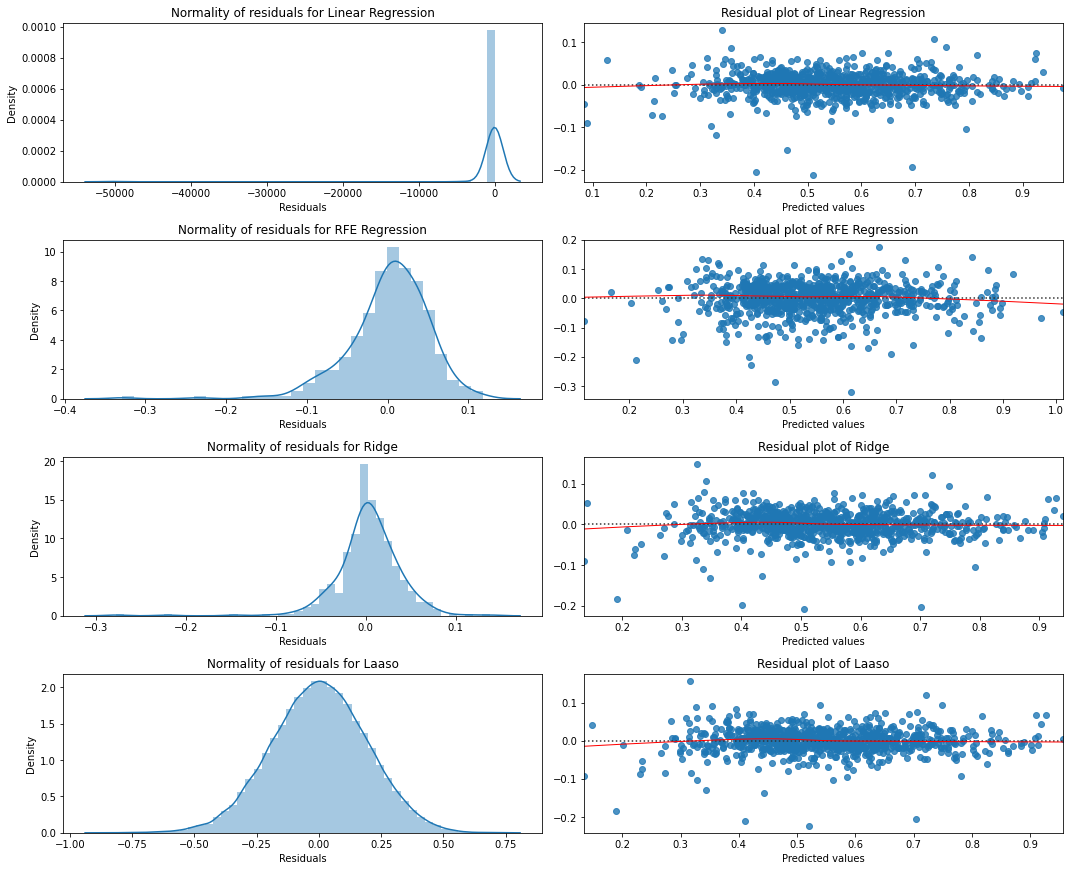

In [2769]:
# plotting for normality of residuals and residual plot for models linear,rfe,ridge,lasso

plt.figure(figsize=(50,50)).set_size_inches(15, 60)
j=1
k=0
res=pd.DataFrame()
Ypredictedcols=[y_test_pred,y_test_rfpred,Y_PRED_TEST1,LY_PRED_TEST1]
titles=['Linear Regression','RFE Regression','Ridge','Laaso']
for i in Ypredictedcols:
    res=Y_test1-i
    plt.subplot(20,2,j)
    sns.distplot(res,kde=True)
    plt.title('Normality of residuals for {}'.format(titles[k]))
    plt.xlabel("Residuals")
    j=j+1
    plt.subplot(20,2,j)
    train=[y_train_pred,y_train_rfpred,Y_PRED_TRAIN1,LY_PRED_TRAIN1]
    sns.residplot(train[k],Y_train1,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.xlabel("Predicted values")
    plt.title('Residual plot of {}'.format(titles[k]))
    k=k+1
    j=j+1
plt.tight_layout()
plt.show();

__Lasso follows better normal distribution of residuals than others and residual plot seems good__<br>
_There is no heteroscadity and error terms are independent_<br>
_Linear assumption holds good for lasso,ridge,RFE_

### MODEL EVALUATION ON TEST DATA

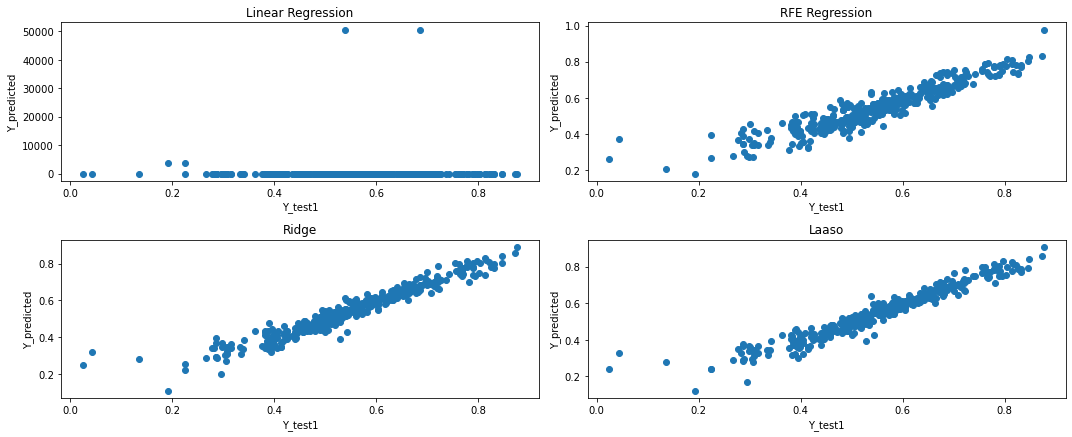

In [2770]:
# plot test data predicted and actual
plt.figure(figsize=(50,50)).set_size_inches(15, 60)
j=1
k=0
Ypredictedcols=[y_test_pred,y_test_rfpred,Y_PRED_TEST1,LY_PRED_TEST1]
titles=['Linear Regression','RFE Regression','Ridge','Laaso']
for i in Ypredictedcols:
    plt.subplot(20,2,j)
    plt.scatter(x=Y_test1,y=i)
    plt.xlabel('Y_test1')
    plt.ylabel('Y_predicted')
    plt.title(titles[k])
    j=j+1
    k=k+1
plt.tight_layout()
plt.show();

__FOR RFE,Ridge,Lasso the actual and predicted almost close and near to each other__
<br>

### Coefficient Values of RIDGE and LASSO

In [2771]:
#Preparing a new data that contains coefficeints of ridge and lasso
Columns=np.array(X_train.columns) #  extract columns list
Columns.reshape(-1,1).shape       
Coefficients=pd.DataFrame(index=Columns)  # assign column names as row indices to data frame
ra=ridge_reg.coef_.reshape(-1,1)  
ra2=ridge_reg2.coef_.reshape(-1,1)
Columns.shape

(248,)

In [2772]:
# Assigning Coefficient values to respective columns in data frame
Coefficients.rows = X_train.columns
Coefficients['Ridge Regression']= ra
Coefficients['Ridge Regression_2']= ra2
Coefficients['Lasso Regression']= lasso_reg.coef_
Coefficients['Lasso Regression_2']= lasso_reg2.coef_

In [2773]:
pd.set_option('display.max_rows', None)
Coefficients
Coefficients.sort_values(by='Ridge Regression',ascending=False).head(10)


,Ridge Regression,Ridge Regression_2,Lasso Regression,Lasso Regression_2
OverallQual,0.100583,0.084664,0.158631,0.169342
GrLivArea,0.096835,0.084872,0.279545,0.285704
1stFlrSF,0.084712,0.074936,0.000000,0.000000
OverallCond,0.071265,0.060536,0.094467,0.088494
TotalBsmtSF,0.064805,0.058177,0.100774,0.097297
BsmtFinSF1,0.060402,0.053420,0.047846,0.048981
2ndFlrSF,0.048790,0.041791,0.000000,0.000000
Neighborhood_StoneBr,0.045725,0.039699,0.041744,0.033276
LotArea,0.045430,0.038603,0.051703,0.044649
GarageCars,0.040674,0.039035,0.052185,0.052530


__For LASSO the important top 5 predictors are GrLivArea,OverallQual,TotalBsmtSF,OverallCond and GarageCars__
<br>
__For Ridge the important top 5 predictors are GrLivArea,OverallQual,TotalBsmtSF,OverallCond and 1stFlrSF__

### EXCLUDING  TOP FIVE PREDICTOR LASSO VARIABLES and REBUILD LASSO MODEL 

In [2774]:
X_mod_train=X_train.drop(['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','GarageCars'],axis=1)
X_mod_test=X_test.drop(['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','GarageCars'],axis=1)

In [2775]:
from sklearn.linear_model import Lasso

#INITIALIZE LASSO REGRESSION
lasso_reg_mod=Lasso()

## CROSS VALIDATION METHOD to find best parameter
folds=5
Lmodel_mod=  GridSearchCV(estimator =lasso_reg_mod, param_grid=Parameters,scoring='neg_mean_absolute_error',cv=folds,
                        return_train_score =True,verbose=1)
Lmodel_mod.fit(X_mod_train,Y_train1)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2776]:
# assigning best parameter to L_mod
L_mod=Lmodel_mod.best_params_


In [2777]:
## FITTING THE MODEL FROM ABOVE PARAMETERS
L_alpha_mod=L_mod['alpha']
print(L_alpha_mod)
lasso_reg_mod=Lasso(alpha=L_alpha_mod)
lasso_reg_mod.fit(X_mod_train,Y_train1)


0.0001


Lasso(alpha=0.0001)

In [2778]:
## PREDICTIONS ON TRAIN DATA AND TEST DATA

Ymod_PRED_TRAIN1=lasso_reg_mod.predict(X_mod_train)
Ymod_PRED_TEST1=lasso_reg_mod.predict(X_mod_test)

## EVALUATION METRICS
LassoMetrics_mod=[]
LR2_train=r2_score(Y_train1,Ymod_PRED_TRAIN1)
LR2_test=r2_score(Y_test1,Ymod_PRED_TEST1)

LRss_train=np.sum(np.square(Y_train1-Ymod_PRED_TRAIN1))
LRss_test=np.sum(np.square(Y_test1-Ymod_PRED_TEST1))

LRMSE_train=np.sqrt(mean_squared_error(Y_train1,Ymod_PRED_TRAIN1))
LRMSE_test=np.sqrt(mean_squared_error(Y_test1,Ymod_PRED_TEST1))

LassoMetrics_mod.extend([LR2_train,LR2_test,LRss_train,LRss_test,LRMSE_train,LRMSE_test])
print(LassoMetrics_mod)

[0.9324504249089549, 0.9170108431279538, 27648.046390927448, 5210.94545060072, 0.03560623272977562, 0.0400069896301078]


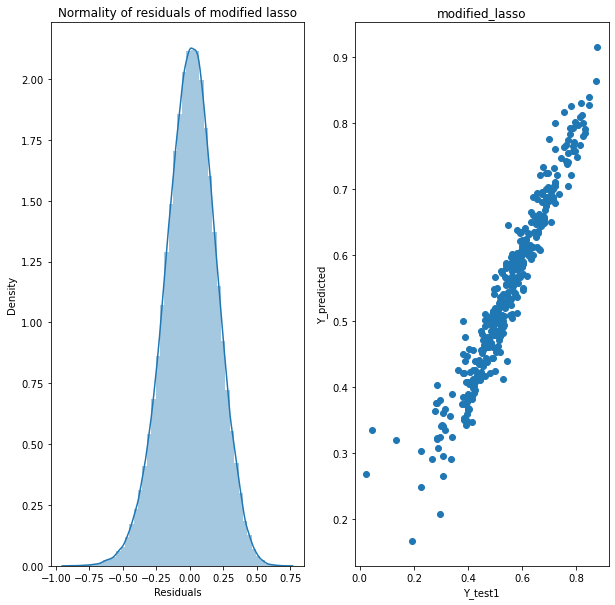

In [2779]:
# Distribution of errors
plt.figure(figsize=(10,10))
new_res=Y_test1-Ymod_PRED_TRAIN1
plt.subplot(1,2,1)
sns.distplot(new_res,kde=True)
plt.title('Normality of residuals of modified lasso')
plt.xlabel("Residuals")
# test vs actua data
plt.subplot(1,2,2)
plt.scatter(x=Y_test1,y=Ymod_PRED_TEST1)
plt.xlabel('Y_test1')
plt.ylabel('Y_predicted')
plt.title('modified_lasso')
plt.show()


__NORMALITY of error terms is achieved. The actual and predicted data looks good__

In [2780]:
# MAking a New data frame with REbuilt Laaso model coefficients
mod_coeff=pd.DataFrame()
mod_coeff['Features']=X_mod_train.columns
mod_coeff['coefficients']=lasso_reg_mod.coef_
mod_coeff.sort_values(by='coefficients',ascending=False).head(10)

,Features,coefficients
8,1stFlrSF,0.260614
9,2ndFlrSF,0.150491
5,BsmtFinSF1,0.108632
20,GarageArea,0.070398
7,BsmtUnfSF,0.063641
82,Neighborhood_StoneBr,0.048179
66,Neighborhood_Crawfor,0.043844
43,MSZoning_FV,0.039114
203,Functional_Typ,0.038473
235,SaleType_New,0.036531


__After excluding 5 variables from data .For LASSO the important top 5 predictors are 1stFlrSF,2ndFlrSF,BsmtFinSF1,GarageArea and BsmtUnfSF__

### STEP:9 CONCLUSIONS

__The optimal values of alpha for ridge and lasso are 3 and 0.0001 respectively__<br>
__The significant variables in predicitng the price of house are<br>
GrLivArea,
OverallQual,
TotalBsmtSF,
OverallCond,
GarageCars,
1stFlrSF,
2ndFlrSF,
BsmtFinSF1,
GarageArea, 
BsmtUnfSF,
LotArea,
Neighborhood_StoneBr__

_These variables' coefficients are in the range 0.1-0.04_

_Among them strong co-relation varaibles with sales price are
GrLivArea -0.77,
OverallQual-0.83,
TotalBsmtSF-0.66,
GarageCars-0.72,
1stFlrSF-0.64,
GarageArea-0.72_